In [29]:
import os
import yaml 
import glob 
import pickle
import pandas as pd
pd.options.display.precision = 2
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams["font.size"] = 15
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

folders = [
    f for f in os.listdir("./") if os.path.isdir(os.path.join("./", f))
]
folders.sort()
print(folders)

path = f'../../../data/Hazumi_features/Hazumi1911_features.pkl'
_, SS_binary, SS_ternary, _, TS_binary, TS_ternary, SP, TP, Text, Audio, Visual, vid = pickle.load(open(path, 'rb'), encoding='utf-8')

columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(TP, orient='index', columns=columns)
tp_df = (df - df.mean() ) / df.std(ddof=0)

def profiling(profile, id, TP=None):
    age = int(id[5])
    gender = id[4]

    per_th = 0

    if profile == 0:
        res = 0
    elif profile == 1:
        if gender == 'F':
            res = 0
        else:
            res = 1
    elif profile == 2:
        if age <= 4:
            res = 0 
        else:
            res = 1
    elif profile == 3:
        if gender == 'F':
            if age <= 4:
                res = 0
            else:
                res = 1
        else:
            if age <= 4:
                res = 2 
            else:
                res = 3
    elif profile == 4:
        res = 1 if TP.loc[id, :][0] >= per_th else 0
    elif profile == 5:
        res = 1 if TP.loc[id, :][1] >= per_th else 0
    elif profile == 6:
        res = 1 if TP.loc[id, :][2] >= per_th else 0
    elif profile == 7:
        res = 1 if TP.loc[id, :][3] >= per_th else 0
    elif profile == 8:
        res = 1 if TP.loc[id, :][4] >= per_th else 0
    return res


['seed_0', 'seed_1', 'seed_2', 'seed_3', 'seed_4']


# 全体的な結果

In [47]:
index = list(range(9))
df_all = pd.DataFrame(0, index=index, columns=['t','a','v','ta','tv','av','tav'])
exp_num = 0
Results = []
for seed, folder in enumerate(folders):
    files = glob.glob(f"./{folder}/*.yaml")
    _df = pd.DataFrame(0, index=index, columns=['t','a','v','ta','tv','av','tav'])
    for file in files:
        with open(file) as file:
            obj = yaml.safe_load(file)
            config = obj["config"]
            results = obj["results"]
            Results.append(results)
            ids = list(results.keys())
            data = list(results.values())
            acc = round(sum(data) / len(data), 3)
            _df.at[config['pmode'], config['modal']] = acc
    # print(f"seed = {seed}")
    df_all += _df
    exp_num += 1
    # display(_df)
df_all /= exp_num
display(df_all)

,t,a,v,ta,tv,av,tav
0,0.49,0.48,0.47,0.50,0.49,0.50,0.50
1,0.48,0.48,0.46,0.49,0.46,0.49,0.51
2,0.53,0.51,0.51,0.53,0.52,0.53,0.53
3,0.53,0.54,0.51,0.54,0.53,0.54,0.55
4,0.47,0.48,0.47,0.47,0.47,0.48,0.49
5,0.46,0.46,0.45,0.47,0.46,0.48,0.47
6,0.45,0.44,0.44,0.46,0.46,0.46,0.47
7,0.44,0.44,0.44,0.47,0.44,0.45,0.44
8,0.46,0.47,0.46,0.48,0.48,0.49,0.49


# ユーザ特性ごとの実験結果

In [45]:
def show_group_results(pmode=1, group_labels=None):
    index = [0, pmode]
    for i in range(len(group_labels)):
        df = pd.DataFrame(0, index=index, columns=['t','a','v','ta','tv','av','tav'])
        exp_num = 0
        Results = []
        for seed, folder in enumerate(folders):
            files = glob.glob(f"./{folder}/*.yaml")
            _df = pd.DataFrame(0, index=index, columns=['t','a','v','ta','tv','av','tav'])
            for file in files:
                with open(file) as file:
                    obj = yaml.safe_load(file)
                    config = obj["config"]

                    if config["pmode"] == 0 or config["pmode"] == pmode:
                        results = []
                        for key, data in obj["results"].items():
                            if profiling(pmode, key, tp_df) == i:
                                results.append(data)
                        acc = round(sum(results) / len(results), 2)
                        _df.at[config["pmode"], config["modal"]] = acc
            df += _df
            exp_num += 1
        df /= exp_num
        print(group_labels[i])
        display(df)

In [46]:
roup_labels = ["女性", "男性"]
# 性別
print("性別")
pmode = 1
group_labels = ["女性", "男性"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 年齢
print("年齢")
pmode = 2
group_labels = ["50歳未満", "50歳以上"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 性別&年齢
print("性別&年齢")
pmode = 3
group_labels = ["女性&50歳未満", "女性&50歳以上", "男性&50歳未満", "男性&50歳以上"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 外向性
print("外向性")
pmode = 4
group_labels = ["Low", "High"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 協調性
print("協調性")
pmode = 5
group_labels = ["Low", "High"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 勤勉性
print("勤勉性")
pmode = 6
group_labels = ["Low", "High"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 神経症傾向
print("神経症傾向")
pmode = 7
group_labels = ["Low", "High"]
show_group_results(pmode=pmode, group_labels=group_labels)

# 開放性
print("開放性")
pmode = 8
group_labels = ["Low", "High"]
show_group_results(pmode=pmode, group_labels=group_labels)



性別
女性


,t,a,v,ta,tv,av,tav
0,0.41,0.41,0.40,0.44,0.42,0.43,0.43
1,0.39,0.38,0.37,0.38,0.34,0.39,0.43


男性


,t,a,v,ta,tv,av,tav
0,0.57,0.57,0.56,0.59,0.58,0.58,0.59
1,0.59,0.60,0.57,0.61,0.60,0.61,0.61


年齢
50歳未満


,t,a,v,ta,tv,av,tav
0,0.39,0.38,0.35,0.40,0.40,0.40,0.41
2,0.45,0.43,0.42,0.46,0.44,0.47,0.46


50歳以上


,t,a,v,ta,tv,av,tav
0,0.59,0.59,0.59,0.61,0.58,0.6,0.60
2,0.60,0.60,0.60,0.60,0.60,0.6,0.61


性別&年齢
女性&50歳未満


,t,a,v,ta,tv,av,tav
0,0.29,0.29,0.25,0.32,0.31,0.31,0.33
3,0.43,0.43,0.42,0.43,0.44,0.43,0.44


女性&50歳以上


,t,a,v,ta,tv,av,tav
0,0.57,0.57,0.59,0.59,0.55,0.59,0.57
3,0.62,0.62,0.62,0.62,0.62,0.63,0.62


男性&50歳未満


,t,a,v,ta,tv,av,tav
0,0.54,0.52,0.52,0.53,0.53,0.54,0.53
3,0.48,0.53,0.44,0.53,0.48,0.50,0.56


男性&50歳以上


,t,a,v,ta,tv,av,tav
0,0.6,0.60,0.58,0.62,0.61,0.60,0.62
3,0.6,0.61,0.58,0.61,0.59,0.61,0.63


外向性
Low


,t,a,v,ta,tv,av,tav
0,0.37,0.36,0.34,0.38,0.38,0.37,0.37
4,0.32,0.33,0.31,0.32,0.32,0.34,0.34


High


,t,a,v,ta,tv,av,tav
0,0.57,0.57,0.57,0.60,0.57,0.59,0.60
4,0.59,0.59,0.58,0.58,0.59,0.59,0.59


協調性
Low


,t,a,v,ta,tv,av,tav
0,0.45,0.45,0.43,0.47,0.46,0.46,0.47
5,0.42,0.43,0.40,0.44,0.43,0.43,0.43


High


,t,a,v,ta,tv,av,tav
0,0.52,0.51,0.5,0.53,0.52,0.52,0.53
5,0.49,0.49,0.5,0.50,0.49,0.52,0.50


勤勉性
Low


,t,a,v,ta,tv,av,tav
0,0.48,0.48,0.47,0.51,0.49,0.50,0.51
6,0.46,0.45,0.43,0.45,0.45,0.45,0.46


High


,t,a,v,ta,tv,av,tav
0,0.49,0.48,0.48,0.50,0.49,0.49,0.50
6,0.44,0.44,0.44,0.47,0.46,0.46,0.48


神経症傾向
Low


,t,a,v,ta,tv,av,tav
0,0.52,0.51,0.50,0.53,0.53,0.53,0.53
7,0.48,0.45,0.46,0.50,0.48,0.48,0.46


High


,t,a,v,ta,tv,av,tav
0,0.43,0.43,0.42,0.46,0.43,0.45,0.45
7,0.39,0.41,0.41,0.43,0.38,0.41,0.40


開放性
Low


,t,a,v,ta,tv,av,tav
0,0.43,0.42,0.42,0.45,0.44,0.43,0.44
8,0.40,0.41,0.39,0.41,0.42,0.42,0.42


High


,t,a,v,ta,tv,av,tav
0,0.53,0.54,0.51,0.55,0.54,0.55,0.55
8,0.52,0.54,0.51,0.54,0.54,0.55,0.55


# 結果プロット

In [64]:
def add_value_label(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i, y_list[i - 1] + 0.005, y_list[i - 1], ha="center")

def plot_results(x=None, y=None, label=None, c=None):
    add_value_label(x, y)
    plt.hlines(y=0.53, xmin=0.5, xmax=0.5 + len(label), color='r', linestyles="dotted")
    plt.text(-0.2, 0.53, "0.53")
    # plt.text(4, 0.535, "人間が予測した場合の精度", color='r')
    print(len(label))
    print(label)
    plt.xlim(0.5, 0.5 + len(label))
    plt.ylim(0.4, np.amax(y) + 0.015)
    plt.xlabel("グルーピングに利用したユーザ特性")
    plt.ylabel("正解率")

    plt.bar(x, y, color=c, tick_label=label)
    plt.xticks(rotation=45)

8
['ベースライン', '性別', '年齢', '外向性', '協調性', '勤勉性', '神経症傾向', '開放性']
0.53


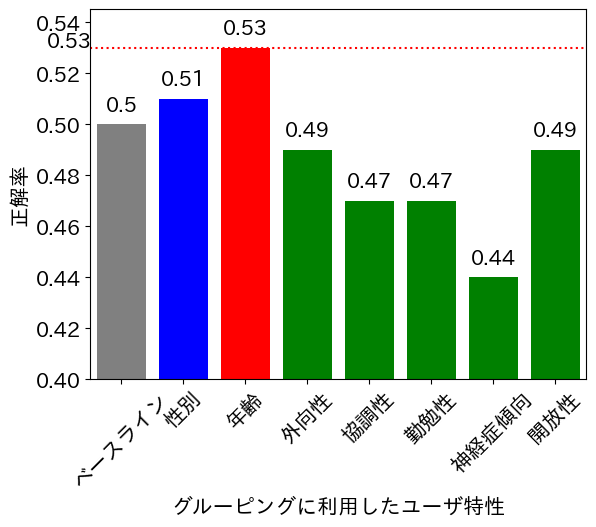

In [65]:
x = np.array(list(range(1, 9)))
y = df_all.loc[[0, 1, 2, 4, 5, 6, 7, 8], "tav"].round(2).to_numpy()
l1 = ["ベースライン", "性別", "年齢", "外向性", "協調性", "勤勉性", "神経症傾向", "開放性"]
c1 = ['gray', 'blue', 'red', 'green', 'green', 'green', 'green', 'green']
plot_results(x, y, label=l1, c=c1)

9
['ベースライン', '性別', '年齢', '性別&年齢', '外向性', '協調性', '勤勉性', '神経症傾向', '開放性']
0.55


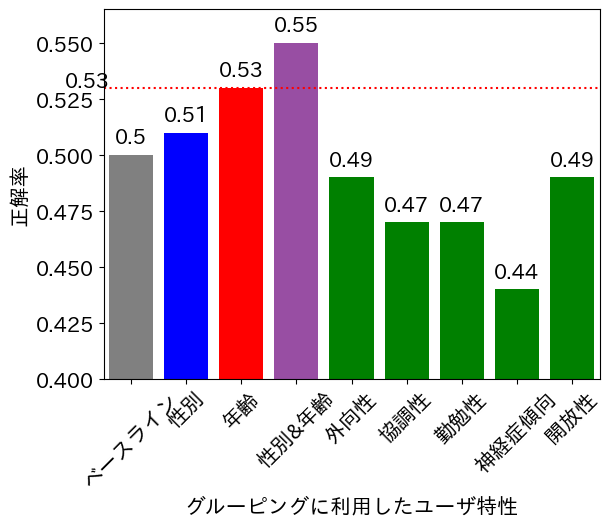

In [66]:
x = np.array(list(range(1, 10)))
y = df_all.loc[:, "tav"].round(2).to_numpy()
l2 = ["ベースライン", "性別", "年齢", "性別&年齢", "外向性", "協調性", "勤勉性", "神経症傾向", "開放性"]
c2 = ['gray', 'blue', 'red', '#984ea3', 'green', 'green', 'green', 'green', 'green']
plot_results(x, y, label=l2, c=c2)